# Statistical Modeling

### import libraries

In [21]:
import sys
sys.path.append('../src')
sys.path.append('../scripts')
from data_quality_check import missing_values_summary
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy import stats
import statsmodels.api as sm
from encoding import encode_categorical_data,split_train_test
from models import train_models,evaluate_models,feature_importance_analysis,report_comparison

In [32]:
df=pd.read_csv('../data/cleaned_data.csv')

In [23]:
df['LossRatio'] = (df['TotalClaims'] / df['TotalPremium'])

In [24]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,LossRatio
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN


In [25]:
df['VehicleType'].value_counts()
df['Province'].value_counts()


Province
Gauteng          393625
Western Cape     170564
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52638
Eastern Cape      30336
Limpopo           24836
Free State         8099
Northern Cape      6380
Name: count, dtype: int64

### Encoding categorical columns

In [33]:
categorical_columns =['Gender','Province','VehicleType','SumInsured']
# Apply one-hot encoding
df_encoded = encode_categorical_data(df, categorical_columns, encoding_type='label')
df_encoded.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [27]:
df_encoded.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt',
       'Converted', 'CrossBorder', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'LossRatio'],
      dtype='object')

#### Train-Test Split

In [37]:
# Define your features and target columns
features = ['Gender','Province','VehicleType','SumInsured']  
target = 'TotalPremium' 

# Call the function to split your dataset
X_train, X_test, y_train, y_test = split_train_test(df_encoded, features, target, test_size=0.2, random_state=42)

# Display the first few rows of the training set
print('X-train \n',X_train.head())
print('Y-train \n',y_train.head())

X-train 
         Gender  Province  VehicleType  SumInsured
352814       2         4            3        2118
815361       2         2            4        2180
129777       2         4            4        1518
936713       2         2            4           0
283940       2         3            4         239
Y-train 
 352814    351.360263
815361      1.584561
129777      0.000000
936713      0.000000
283940      0.000000
Name: TotalPremium, dtype: float64


In [38]:

# Train the models
models = train_models(X_train, y_train)

# Evaluate the models
evaluation_results = evaluate_models(models, X_test, y_test)

# Print the evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"Model: {model_name}")
    print(f"Mean Absolute Error: {metrics['Mean Absolute Error']}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"R-Squared: {metrics['R-Squared']}")
    print("\n")


Model: Linear Regression
Mean Absolute Error: 82.32227572308301
Mean Squared Error: 22635.341973186158
R-Squared: 0.08004285064900685


Model: Decision Tree
Mean Absolute Error: 46.438863580110194
Mean Squared Error: 10367.837730037907
R-Squared: 0.5786250344987928


Model: Random Forest
Mean Absolute Error: 46.46042612115639
Mean Squared Error: 10354.387581032792
R-Squared: 0.5791716823361328


Model: XGBoost
Mean Absolute Error: 51.73067068020388
Mean Squared Error: 11929.895284753007
R-Squared: 0.5151390921675398




In [30]:
# from sklearn.preprocessing import StandardScaler

# # Instantiate the scaler
# scaler = StandardScaler()

# # Apply scaling on the features
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


### 2. Feature Importance Analysis:
For models like Decision Trees, Random Forests, and XGBoost, feature importance is readily available, showing which features contribute the most to the model's predictions.

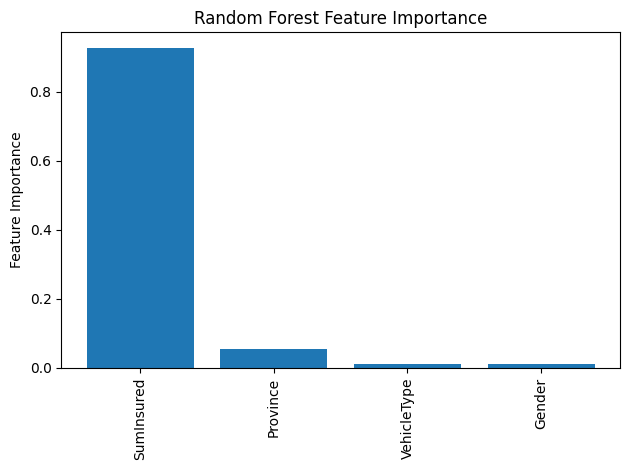

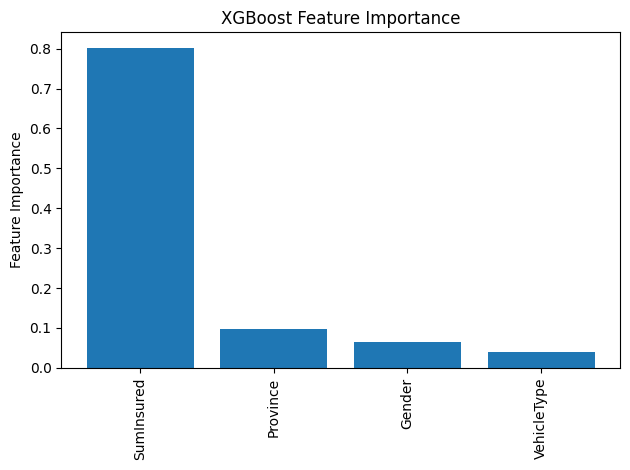

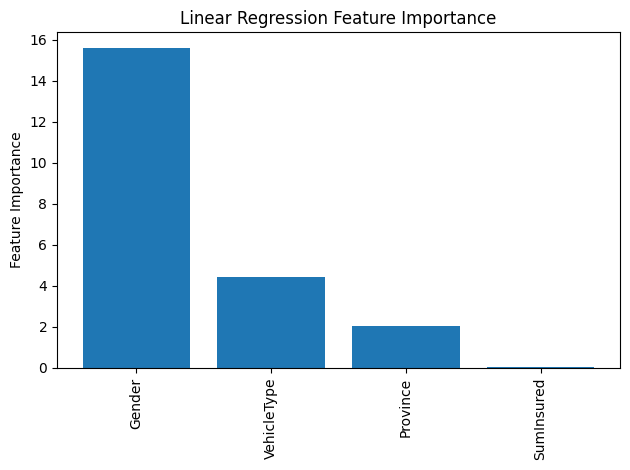

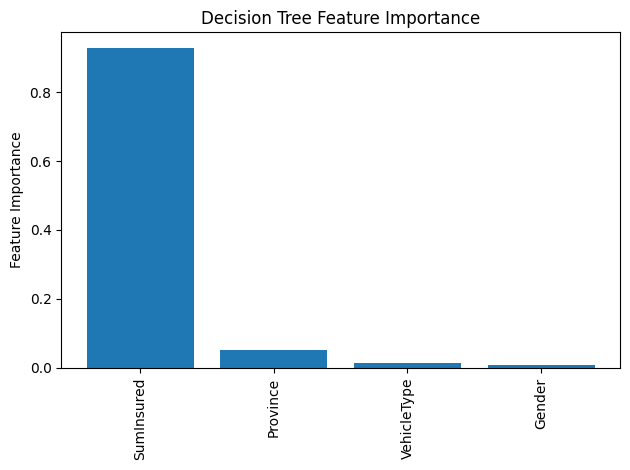


Model Performance Comparison:
                   Mean Squared Error  Mean Absolute Error  R-Squared
Linear Regression        22635.341973            82.322276   0.080043
Decision Tree            10367.837730            46.438864   0.578625
Random Forest            10354.387581            46.460426   0.579172
XGBoost                  11929.895285            51.730671   0.515139


In [39]:
# Feature Importance Analysis
feature_importance_analysis(models, X_train, feature_names = ['Gender','Province','VehicleType','SumInsured'])



# Performance Comparison Report
report_comparison(evaluation_results)
